# Project: Exploratory Data Analysis, Regression, and Classification

## Objective
The goal of this project is to perform Exploratory Data Analysis (EDA) on two datasets, apply regression models (Linear and Logistic), and implement classification models (SVM and KNN). We will predict house prices using Linear Regression on the House Prices dataset and predict passenger survival using Logistic Regression, SVM, and KNN on the Titanic dataset.

## Dataset Overview
- **House Prices Dataset (Kaggle)**: Contains 1460 training samples with 81 features (e.g., LotArea, YearBuilt, Neighborhood) and target 'SalePrice'. Used for regression.
- **Titanic Dataset (CSV)**: Contains 891 samples with features like Age, Sex, Pclass, Fare, and target 'Survived' (binary: 0=did not survive, 1=survived). Used for classification and logistic regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Setting seaborn style for better visuals
sns.set(style="whitegrid")

## Exploratory Data Analysis (EDA)
We load the datasets, visualize distributions, correlations, and key relationships.

In [2]:
# Loading datasets
house_df = pd.read_csv('train.csv') 
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Displaying basic info
print("House Prices Dataset Info:")
print(house_df.info())
print("\nTitanic Dataset Info:")
print(titanic_df.info())

# Summary of statistics
print("\nHouse Prices Summary:")
print(house_df.describe())
print("\nTitanic Summary:")
print(titanic_df.describe())

House Prices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

### Visual Exploration

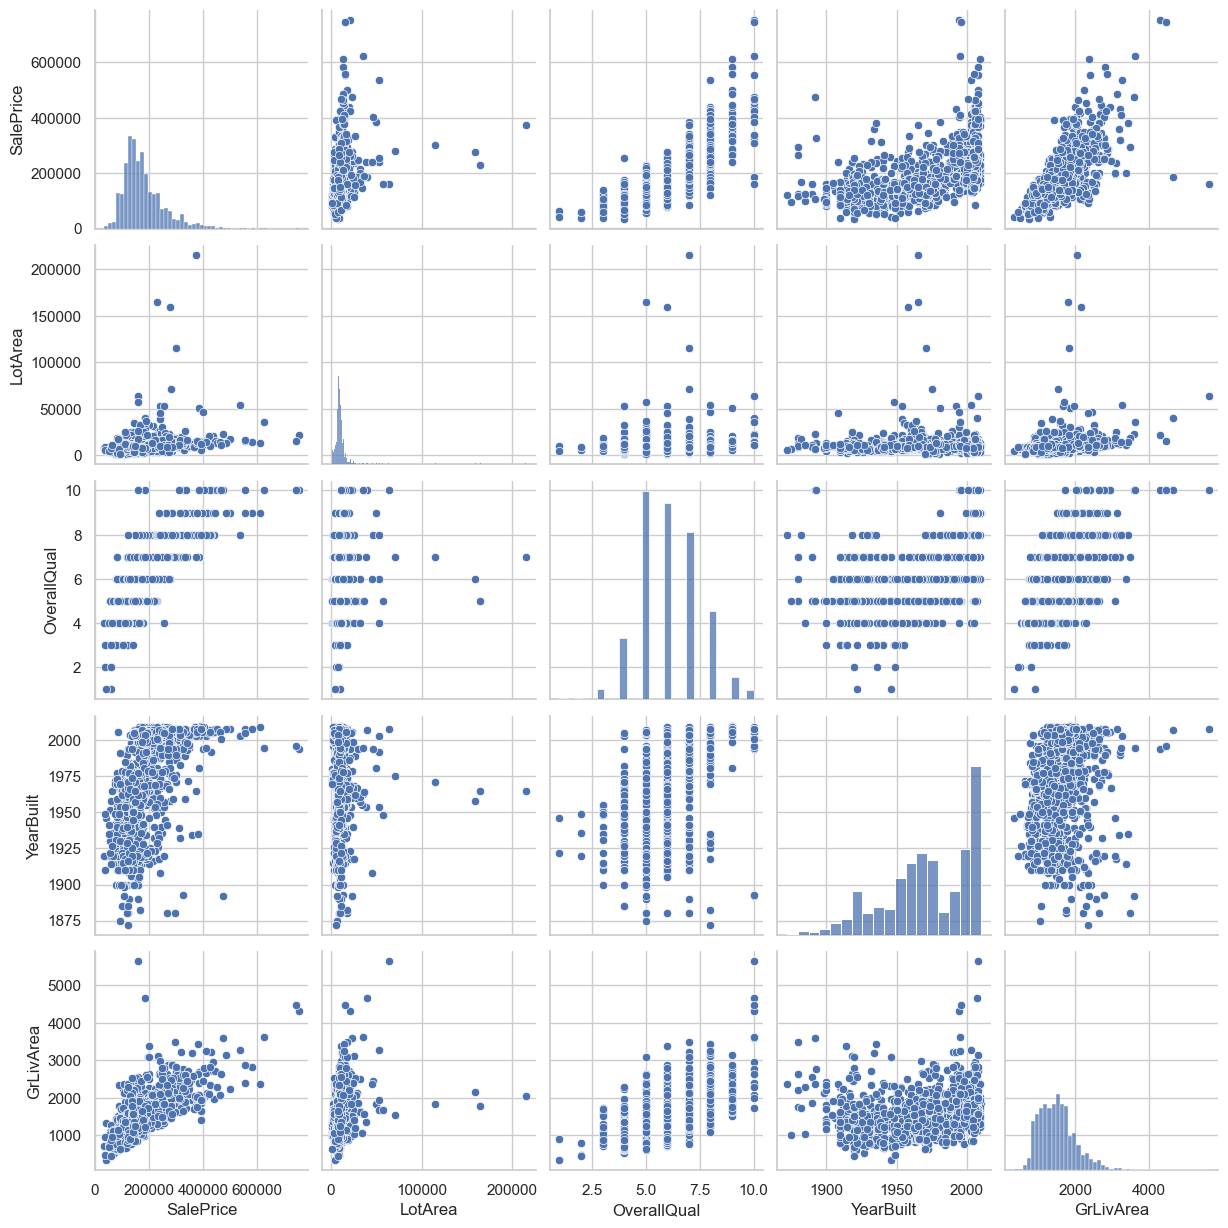

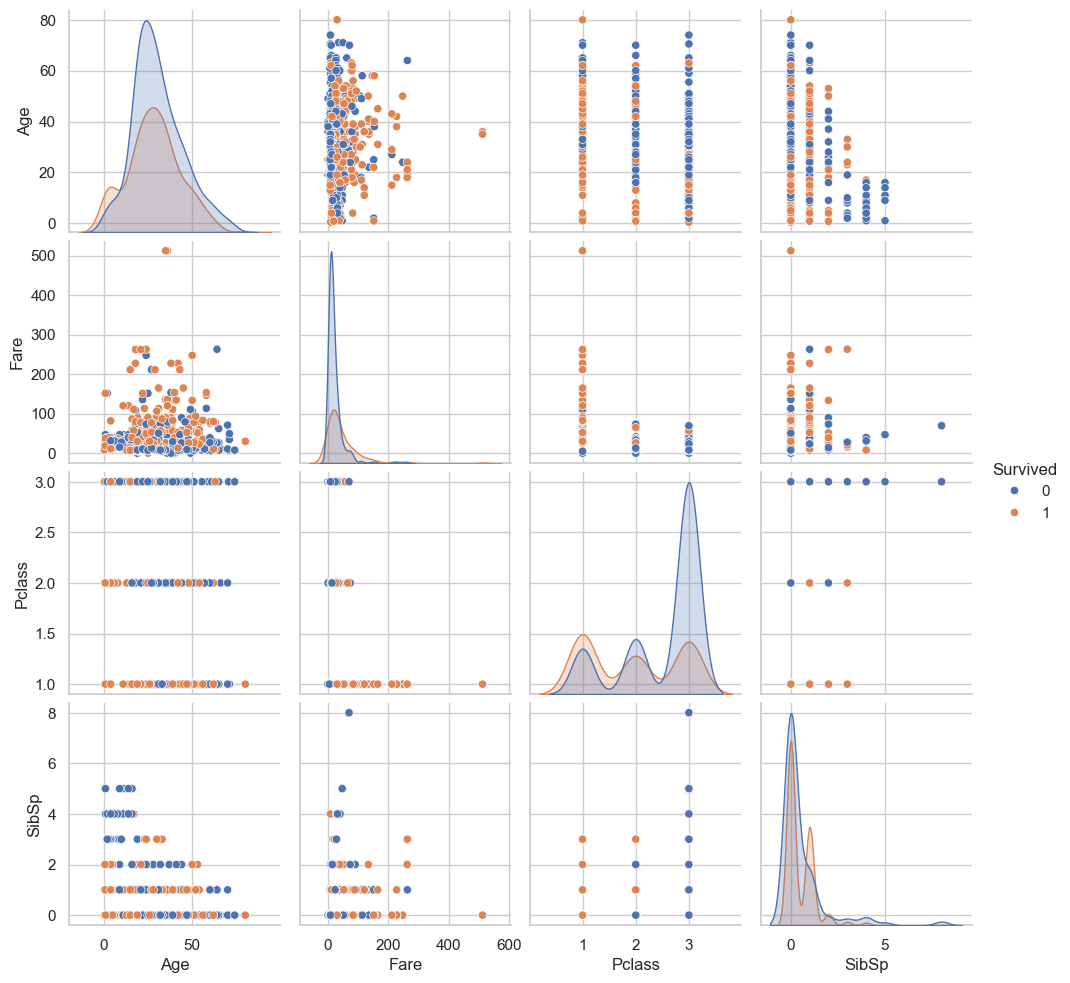

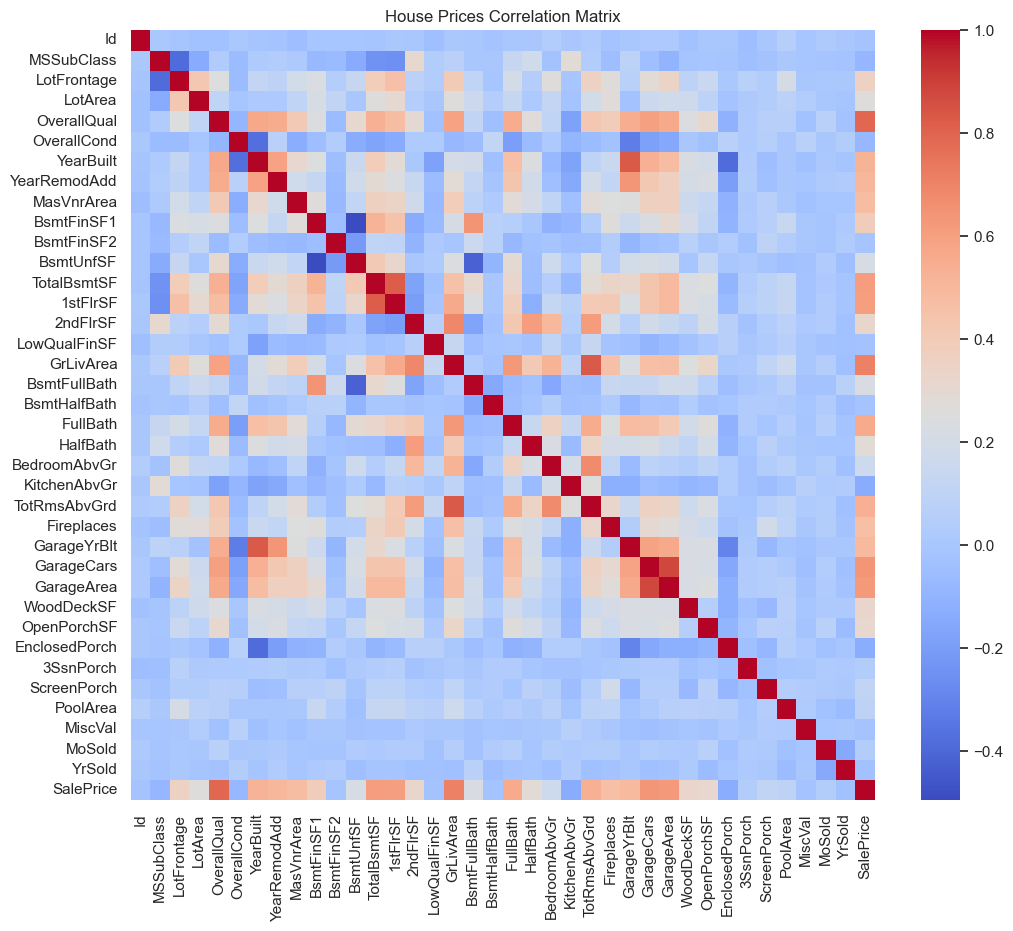

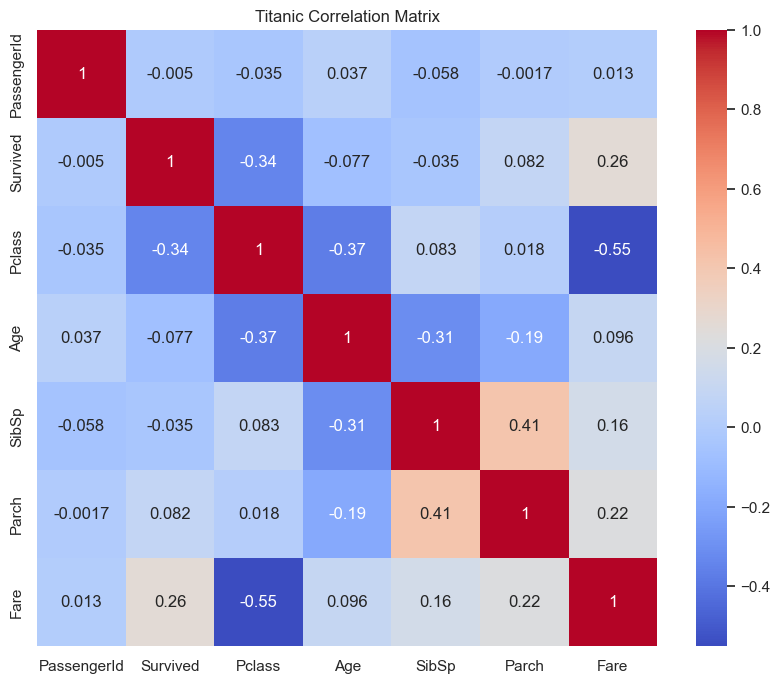

In [3]:
# Pairplot for key features in House Prices (select a subset to avoid overload)
sns.pairplot(house_df[['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea']])
plt.show()

# Pairplot for Titanic
sns.pairplot(titanic_df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp']], hue='Survived')
plt.show()

# Correlation heatmap for House Prices (numeric features only)
numeric_house = house_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_house.corr(), annot=False, cmap='coolwarm')
plt.title('House Prices Correlation Matrix')
plt.show()

# Correlation heatmap for Titanic (numeric features)
numeric_titanic = titanic_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Titanic Correlation Matrix')
plt.show()

Key Relationships Identified:
- In House Prices: SalePrice strongly correlates with OverallQual, GrLivArea, and YearBuilt.
- In Titanic: Survival correlates with Pclass (negative), Fare (positive), and Sex (females higher survival).

## Feature Engineering
Handle missing values, encode categorical variables.

In [4]:
# House Prices: Handle missing values and encode categoricals
house_df.fillna({'LotFrontage': house_df['LotFrontage'].median()}, inplace=True)  
# Select features (simplified)
house_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'Neighborhood', 'LotArea']
house_target = 'SalePrice'

# Pipeline for preprocessing
numeric_features_house = ['OverallQual', 'GrLivArea', 'GarageCars', 'LotArea']
categorical_features_house = ['Neighborhood']

preprocessor_house = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features_house),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_house)
    ])

X_house = preprocessor_house.fit_transform(house_df[house_features])
y_house = house_df[house_target]

# Titanic: Handle missing values and encode
titanic_df.fillna({"Age" : titanic_df['Age'].median()}, inplace=True)
titanic_df.fillna({"Embarked" : titanic_df['Embarked'].mode()[0]}, inplace=True)

# Encode categoricals
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

titanic_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic_target = 'Survived'

X_titanic = titanic_df[titanic_features]
y_titanic = titanic_df[titanic_target]

## Regression Models
Split data and apply Linear Regression (House Prices) and Logistic Regression (Titanic).

In [5]:
# Split data
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Linear Regression (House Prices)
lin_reg = LinearRegression()
lin_reg.fit(X_house_train, y_house_train)
y_house_pred = lin_reg.predict(X_house_test)
mse = mean_squared_error(y_house_test, y_house_pred)
print(f"Linear Regression MSE: {mse}")

# Logistic Regression (Titanic Survival)
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_titanic_train, y_titanic_train)
y_titanic_log_pred = log_reg.predict(X_titanic_test)
log_accuracy = accuracy_score(y_titanic_test, y_titanic_log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")

Linear Regression MSE: 1402977127.9376547
Logistic Regression Accuracy: 0.8100558659217877


## Classification Models
Apply SVM and KNN on Titanic for survival prediction.

In [6]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_titanic_train, y_titanic_train)
y_titanic_svm_pred = svm_model.predict(X_titanic_test)
svm_accuracy = accuracy_score(y_titanic_test, y_titanic_svm_pred)
print(f"SVM Accuracy: {svm_accuracy}")

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_titanic_train, y_titanic_train)
y_titanic_knn_pred = knn_model.predict(X_titanic_test)
knn_accuracy = accuracy_score(y_titanic_test, y_titanic_knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")

SVM Accuracy: 0.7821229050279329
KNN Accuracy: 0.7206703910614525


## Results
Visualize confusion matrices and regression plots.

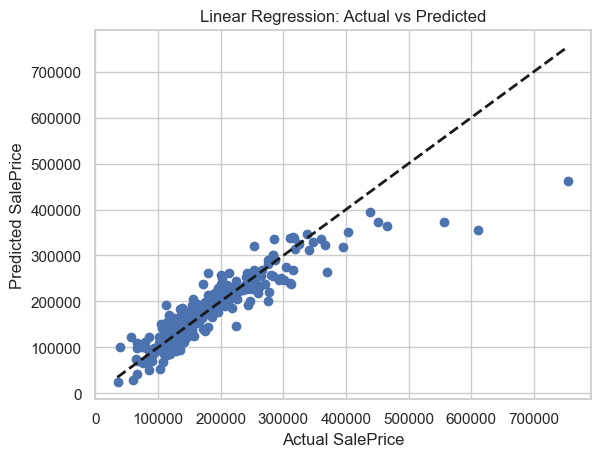

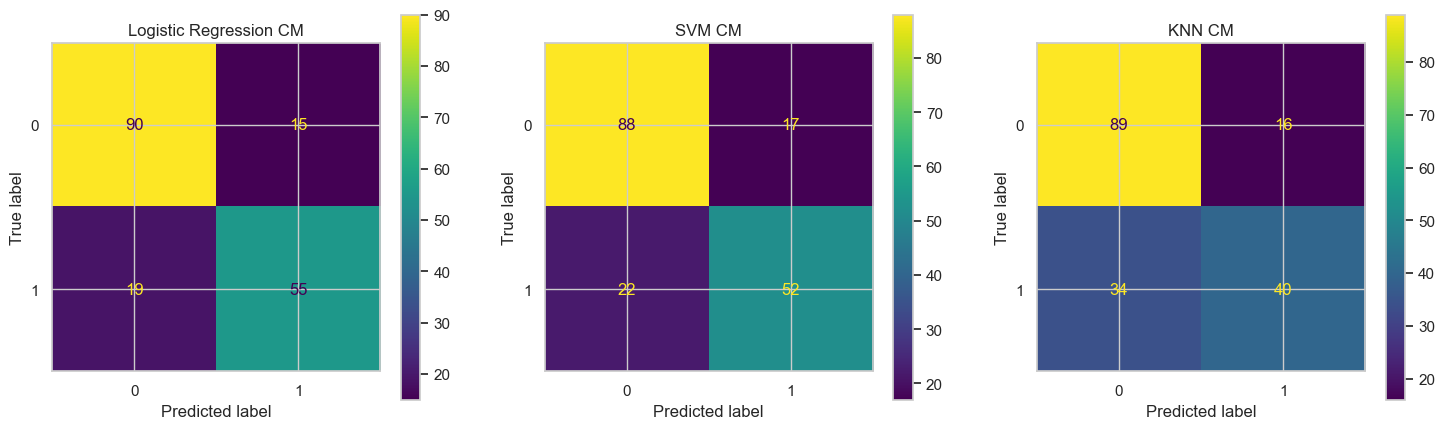

In [7]:
# Regression Plot (Linear)
plt.scatter(y_house_test, y_house_pred)
plt.plot([y_house.min(), y_house.max()], [y_house.min(), y_house.max()], 'k--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic
cm_log = confusion_matrix(y_titanic_test, y_titanic_log_pred)
ConfusionMatrixDisplay(cm_log).plot(ax=axes[0])
axes[0].set_title('Logistic Regression CM')

# SVM
cm_svm = confusion_matrix(y_titanic_test, y_titanic_svm_pred)
ConfusionMatrixDisplay(cm_svm).plot(ax=axes[1])
axes[1].set_title('SVM CM')

# KNN
cm_knn = confusion_matrix(y_titanic_test, y_titanic_knn_pred)
ConfusionMatrixDisplay(cm_knn).plot(ax=axes[2])
axes[2].set_title('KNN CM')

plt.show()

## Conclusion
We performed EDA, identifying key correlations. Linear Regression achieved an MSE of [Linear Regression MSE: 1402977127.9376547
Logistic Regression Accuracy: 0.8100558659217877]. Logistic Regression, SVM, and KNN on Titanic had accuracies of [SVM Accuracy: 0.7821229050279329
KNN Accuracy: 0.7206703910614525]. Further improvements could include hyperparameter tuning or more features.